# Stock Market Analysis
<h3 style="font-family:Courier;font-size:10px;">Converted for Python3</h3>

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
#imports for reading stock data
from pandas.io.data import DataReader
#for timestamps
from datetime import datetime
#to take care of floats
#from __future__ import division

C:\Users\JamesDillon\Anaconda3\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
#list of tech stocks tickers
tech_list = ['AAPL','GOOG','MSFT','AMZN']
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [3]:
#grab finance data and create a DataFrame
for stock in tech_list:
    #globals allows string name to become DataFrame, creates 4 DataFrames
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [4]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,104.360952,105.279246,103.533611,104.451508,3.854104e+07,103.408069
std,7.434753,7.405816,7.524514,7.494169,1.698451e+07,7.862711
min,90.000000,91.669998,89.470001,90.339996,1.142440e+07,89.394274
25%,97.295000,98.205000,96.542502,97.137499,2.701110e+07,95.808918
50%,105.494999,106.279999,104.794998,105.694999,3.374060e+07,104.171987
75%,110.090002,111.114998,109.262499,110.417503,4.451040e+07,109.959997
max,118.180000,118.690002,117.449997,118.250000,1.333697e+08,117.645979


In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-12-28 to 2016-12-23
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


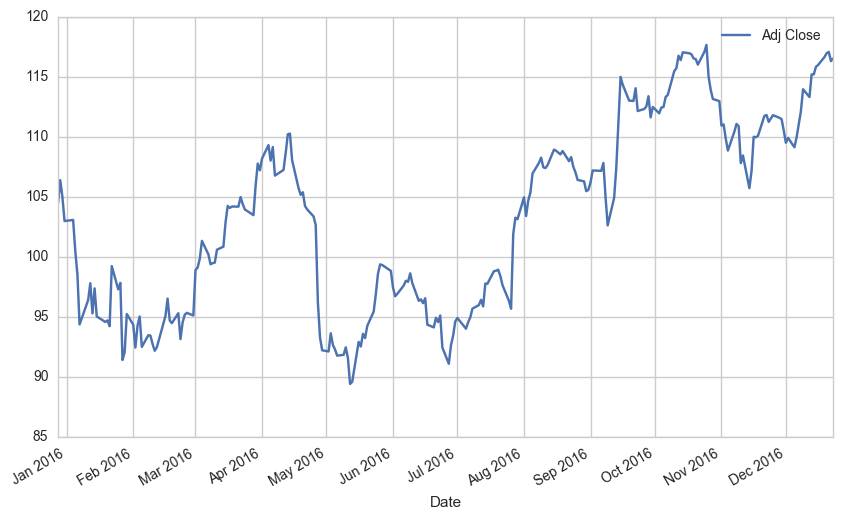

In [6]:
#plot the adjusted close
AAPL['Adj Close'].plot(legend=True,figsize=(10,6))

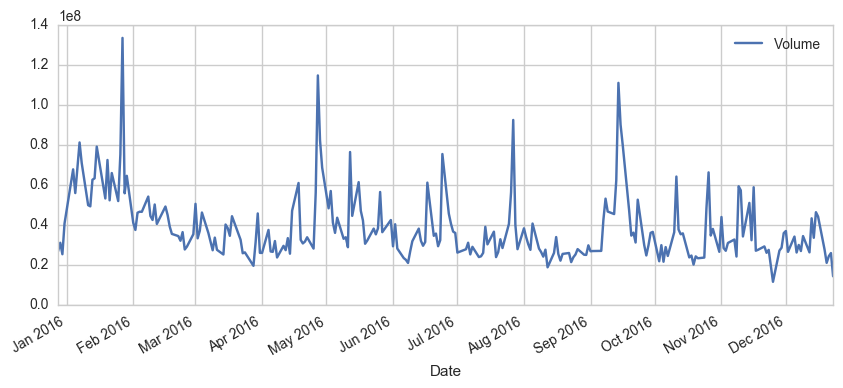

In [7]:
#plot the total volume of stocks traded each day
AAPL['Volume'].plot(legend=True,figsize=(10,4))

## Info on moving averages
1.) http://www.investopedia.com/terms/m/movingaverage.asp <br>
2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [8]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

C:\Users\JamesDillon\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
C:\Users\JamesDillon\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).mean()
C:\Users\JamesDillon\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=50).mean()


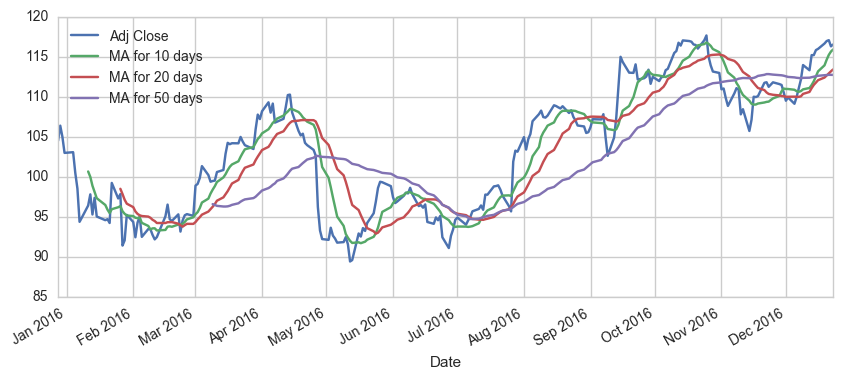

In [9]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

## Daily Returns

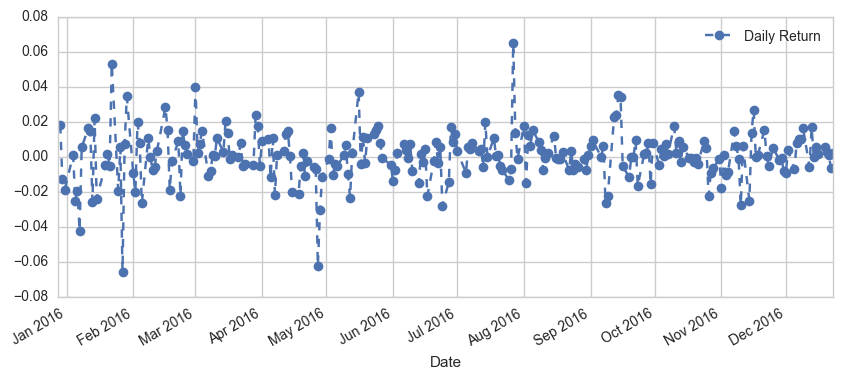

In [10]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker=
                         'o')

C:\Users\JamesDillon\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


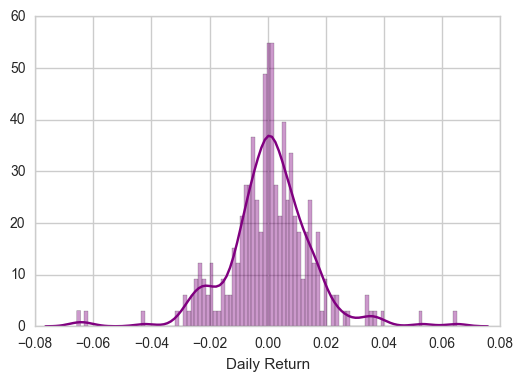

In [11]:
#place two plots on top of one another
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

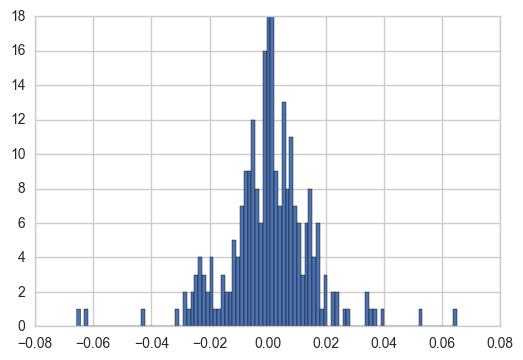

In [12]:
#use pandas built-in histogram
AAPL['Daily Return'].hist(bins=100)

## Analyze the returns of all the stocks on our list

In [13]:
#grab web data with the DataReader method
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [14]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-12-28,104.495069,675.200012,762.510010,54.455724
2015-12-29,106.373279,693.969971,776.599976,55.039699
2015-12-30,104.984187,689.070007,771.000000,54.806110
2015-12-31,102.969025,675.890015,758.880005,53.998276
2016-01-04,103.057063,636.989990,741.840027,53.336436


In [15]:
tech_rets = closing_df.pct_change()

In [16]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-12-28,NaN,NaN,NaN,NaN
2015-12-29,0.017974,0.027799,0.018478,0.010724
2015-12-30,-0.013059,-0.007061,-0.007211,-0.004244
2015-12-31,-0.019195,-0.019127,-0.015720,-0.014740
2016-01-04,0.000855,-0.057554,-0.022454,-0.012257


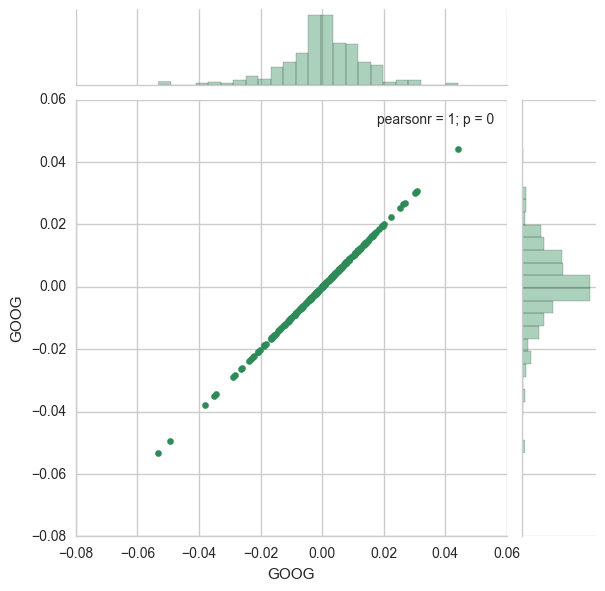

In [17]:
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter', color = 'seagreen')

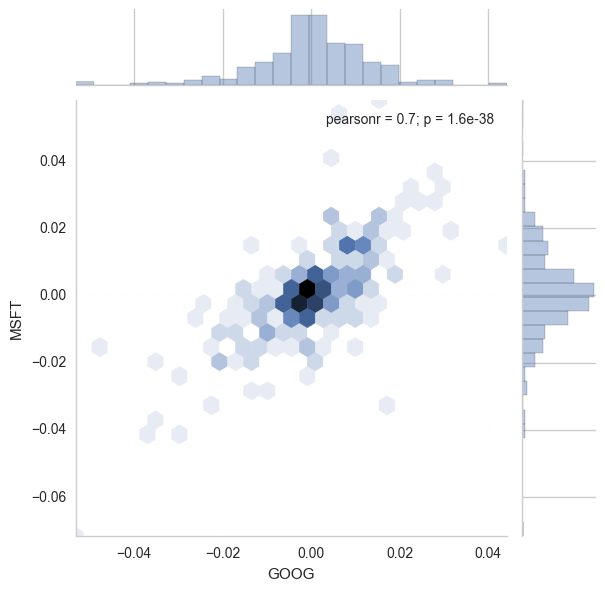

In [18]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='hex')

Point of interest:  the Pearson r value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are.  You can find more information about it at this linK

url = http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below:

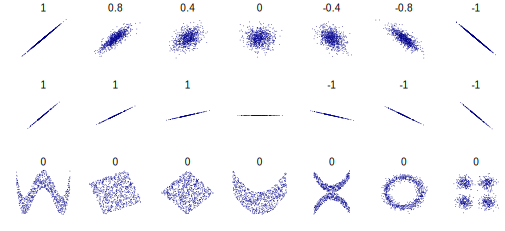

In [19]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

## Make a comparison analysis plot w/ a pairplot

In [20]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-12-28,NaN,NaN,NaN,NaN
2015-12-29,0.017974,0.027799,0.018478,0.010724
2015-12-30,-0.013059,-0.007061,-0.007211,-0.004244
2015-12-31,-0.019195,-0.019127,-0.015720,-0.014740
2016-01-04,0.000855,-0.057554,-0.022454,-0.012257


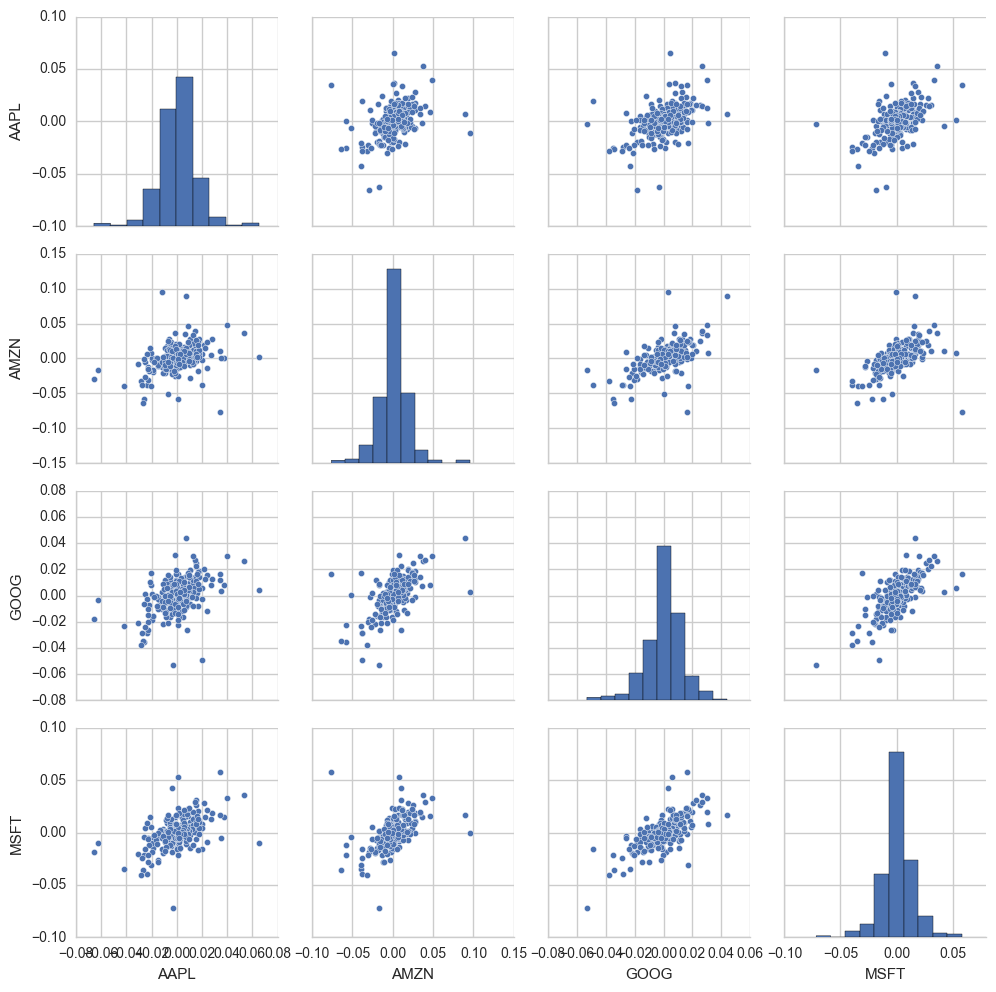

In [21]:
sns.pairplot(tech_rets.dropna())

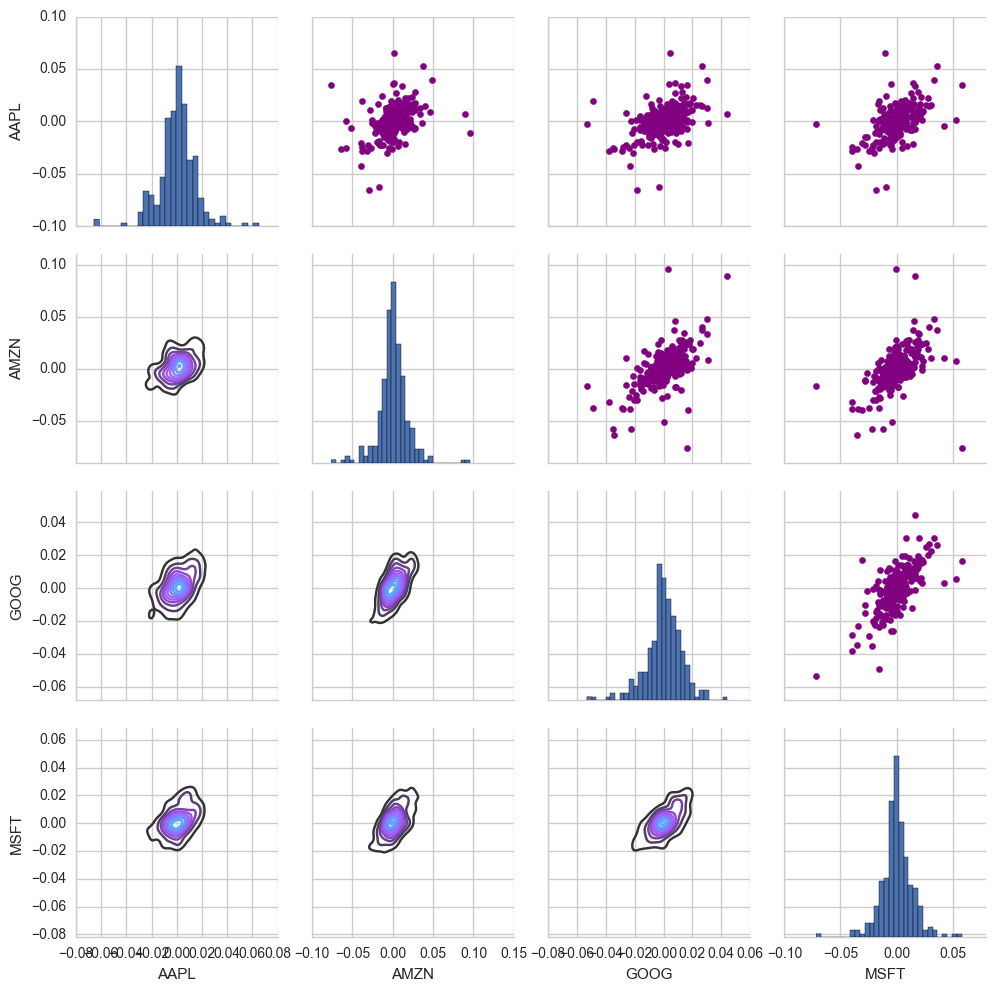

In [22]:
#we can exercise more control w/ sns.pairgrid
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

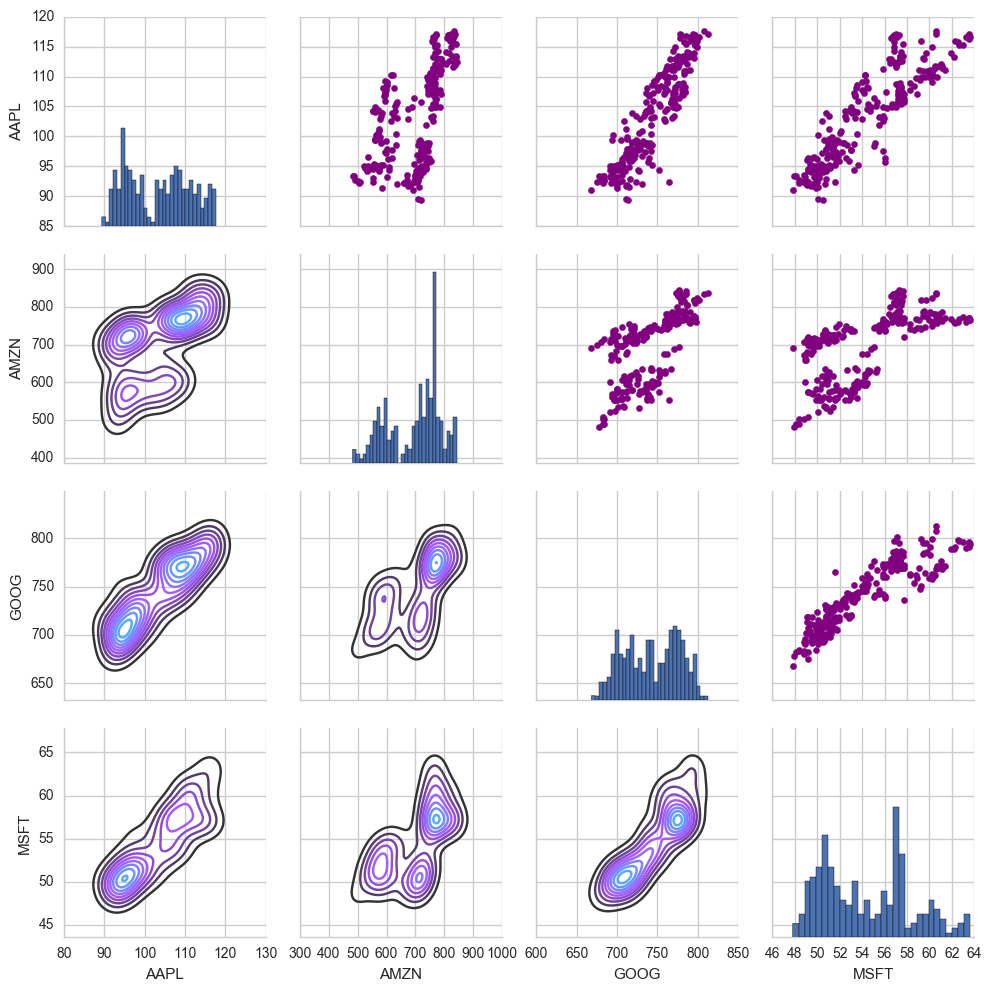

In [23]:
#check out the pair grid for the daily closing values
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

C:\Users\JamesDillon\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\JamesDillon\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


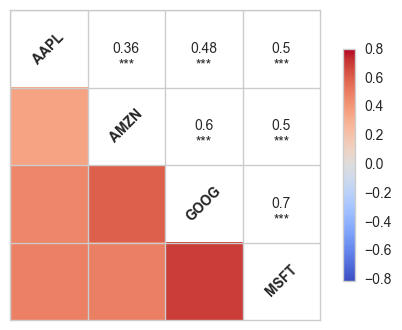

In [24]:
#use Seaborn for a quick correlation plot for the daily return
from seaborn.linearmodels import corrplot #corrplot has been deprecated and will likely be removed in its entirety
corrplot(tech_rets.dropna(),annot=True)

C:\Users\JamesDillon\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\JamesDillon\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


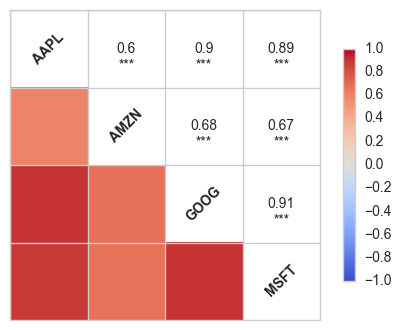

In [25]:
corrplot(closing_df,annot=True)

## Risk Analysis
#### How can we quantify risk?
#### Compare expected return w/ standard deviation of the daily return
Info on advanced matplotlib labelling options
url = http://matplotlib.org/users/annotations_guide.html

In [26]:
url = 'http://matplotlib.org/users/annotations_guide.html'

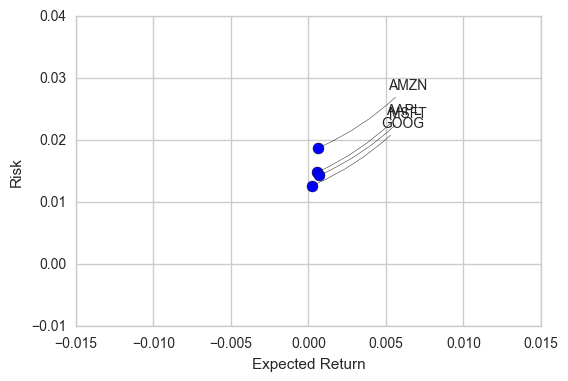

In [27]:
rets = tech_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s = area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
for label, x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50,50),
        textcoords = 'offset points', ha = 'left', va = 'top',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.1'))

## Value at Risk
### Using the 'bootstrap' method
For this method we will calculate the empirical  quantities form a histogram of daily returns.  For more information on quanitities, check out this link:
http://en.wikipedia.org/wiki/Quantile

#### Value at risk = the amount of money we could expect to lose for a given confidence interval.

C:\Users\JamesDillon\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


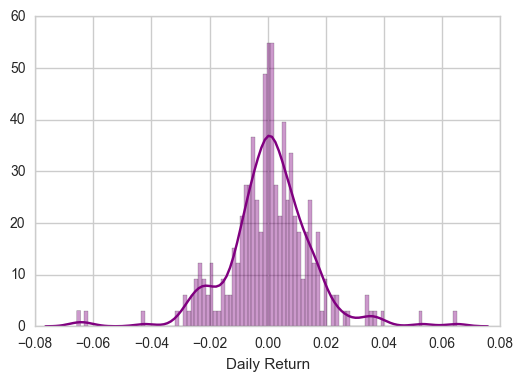

In [28]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [29]:
#use quantile to get the risk value of a stock, quantiles are built into Pandas
rets['AAPL'].quantile(0.05)

-0.023107282341668645

### within 95% confidence, our worst possible loss would be 2.3% for any given day.

# The Monte Carlo Method

Using the Monte Carlo Method to run many trials with random market conditions, then we'll calculate portfolio losses for each trial.  After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We wil use the geometric Brownian motion (GBM), which is technically known as a Markov process.  This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Brownian motion is given by the following equation:

$$\frac{\Delta S}{S}=\mu\Delta t+\sigma\epsilon\sqrt{\Delta t}$$

Where S is the stock price, mu is the expected return (which we calculated earlier), sigma is the standard deviation of the returns, t is the time, and epsilon is the random variable.

We can multiply both sides by the stock price (S) to rearrange the formula and sole for the stock price.

$$\Delta S=S(\mu\Delta t+\sigma\epsilon\sqrt{\Delta t})$$

Now we see that the change in the stock price is the current stock price multiplied by two terms.  The first term is knows as "drift" and then experience a "shock" which will randomly push the stock up or down.  By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be. 

For more info: http://www.investopedia.com/articles/07/montecarlo.asp

We will start with a few simulations of the Monte Carlo method on the Google DataFrame.

In [30]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
# Mu is associated with drift
mu = rets.mean()['GOOG']

# Sigma is equivalent to our shock
sigma = rets.std()['GOOG']

In [37]:
def stock_monte_carlo(start_price,days,mu,sigma):
    #define a price array
    price = np.zeros(days) #array of zeros with same length as days
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt)) #check out normal distribution notes in the appendix
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [38]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-12-28,752.919983,762.989990,749.520020,762.510010,1515300,762.510010
2015-12-29,766.690002,779.979980,766.429993,776.599976,1765000,776.599976
2015-12-30,776.599976,777.599976,766.900024,771.000000,1293300,771.000000
2015-12-31,769.500000,769.500000,758.340027,758.880005,1489600,758.880005
2016-01-04,743.000000,744.059998,731.257996,741.840027,3272800,741.840027


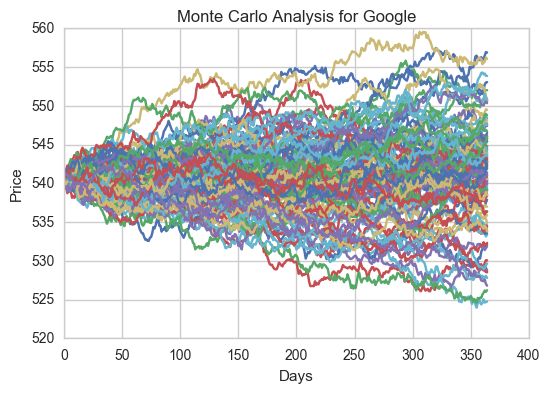

In [39]:
start_price = 540.74

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

## Create a histogram of the data

In [42]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    

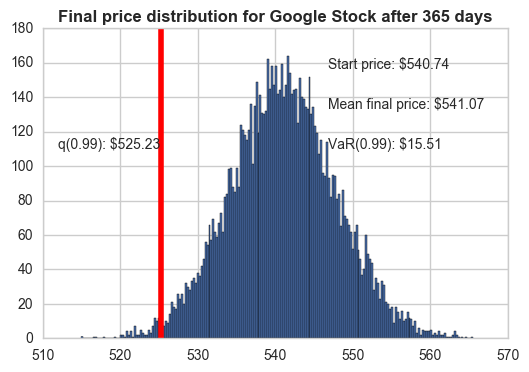

In [44]:
q = np.percentile(simulations,1) #define q as the 1% empirical quantile, 99% of values should fit within our output

plt.hist(simulations,bins=200)
# Starting Price
plt.figtext(0.6,0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q))
# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)
# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')
# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');